In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [20]:
#print(x_train.shape) # 6000 list of a matrice 28x28
# accessing the shape of any numpy array with my_numpy_array.shape
print("x_train has shapes", x_train.shape) # a 60000 x 28 x 28 numpy array 

x_train has shapes (60000, 28, 28)


minimum value 0
maximum value 255


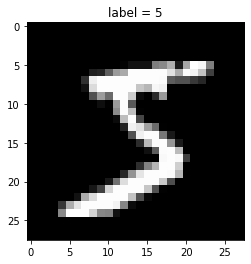

In [21]:
# selecting the first image of our dataset 

img = x_train[0]
print("minimum value", np.min(img))
print("maximum value", np.max(img))
# let's display the image
plt.imshow(img, cmap="gray") 
plt.title(f"label = {str(y_train[0])}") # the image's label
plt.show()

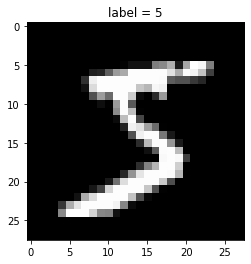

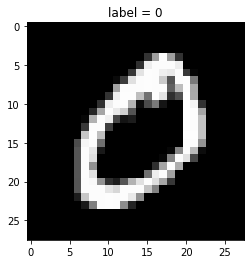

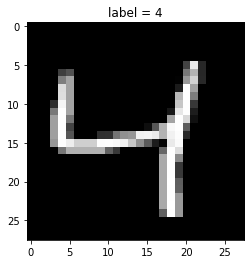

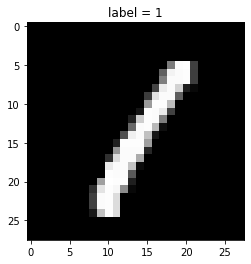

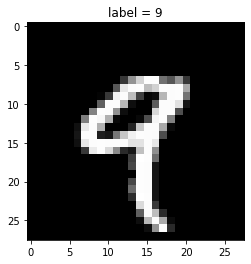

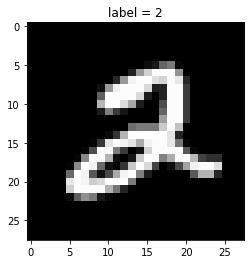

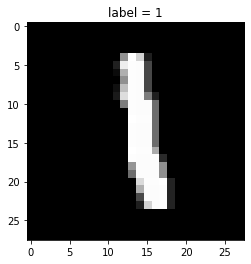

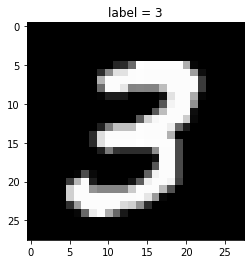

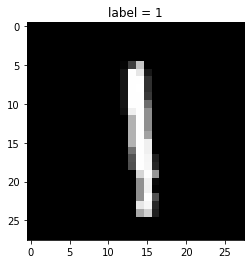

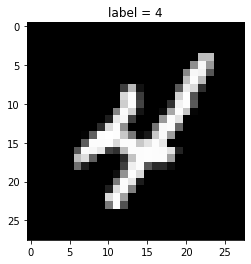

In [22]:
for i in range(10): 
    img = x_train[i]
    # let's display the image
    plt.imshow(img, cmap="gray") 
    plt.title(f"label = {str(y_train[i])}") # the image's label
    plt.show()

In [23]:
x_train = np.reshape(x_train, newshape=[x_train.shape[0], -1]) 
x_test = np.reshape(x_test, newshape=[x_test.shape[0], -1])

x_train = x_train / 255.0 # makes the computation easier
x_test = x_test / 255.0 # makes the computation easier 

In [25]:
# let's check the shape of our datasets
print("x_train new shapes", x_train.shape) 
print("x_test new shapes", x_test.shape)

x_train new shapes (60000, 784)
x_test new shapes (10000, 784)


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [28]:
print(y_train[:10]) # only displaying the first 10 labels
print("new y_train shape", y_train.shape) 
print("new y_test shape", y_test.shape)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
new y_train shape (60000, 10)
new y_test shape (10000, 10)


In [29]:
input_shape = x_train.shape[1:]

In [35]:
# creating a neural network
my_dnn = tf.keras.Sequential([
    # the entry point is our input ! We need to specify the shape of this input 
    tf.keras.Input(shape=input_shape), #couche 0
    # We can now add our layers ! 
    tf.keras.layers.Dense(16), #couche 1
    tf.keras.layers.Dense(16), #couche 2
    tf.keras.layers.Dense(10)  #couche 3
])

In [34]:
my_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [38]:
16*10 + 10

170

In [39]:
epochs = 10 
batch_size = 8 # 8 images each iteration
lr = 0.001 # learning rate

In [40]:
# Calling comile in order to setup the training
optimizer = tf.keras.optimizers.SGD(
    learning_rate=lr, momentum=0.0
)
my_dnn.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [41]:
history = my_dnn.fit(    
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
)

Epoch 1/10
7500/7500 [==============================] - 17s 2ms/step - loss: 7.6153 - accuracy: 0.0988
Epoch 2/10
7500/7500 [==============================] - 16s 2ms/step - loss: 7.6776 - accuracy: 0.0986
Epoch 3/10
7500/7500 [==============================] - 16s 2ms/step - loss: 7.6341 - accuracy: 0.0986 0s - loss: 7.635
Epoch 4/10
7500/7500 [==============================] - 16s 2ms/step - loss: 7.6340 - accuracy: 0.0986
Epoch 5/10
7500/7500 [==============================] - 16s 2ms/step - loss: 7.6341 - accuracy: 0.0986
Epoch 6/10
7500/7500 [==============================] - 16s 2ms/step - loss: 7.6341 - accuracy: 0.0986
Epoch 7/10
7500/7500 [==============================] - 16s 2ms/step - loss: 7.6341 - accuracy: 0.0986
Epoch 8/10
7500/7500 [==============================] - 16s 2ms/step - loss: 7.6340 - accuracy: 0.0986
Epoch 9/10
7500/7500 [==============================] - 16s 2ms/step - loss: 7.6341 - accuracy: 0.0986
Epoch 10/10
7500/7500 [==============================] -

In [42]:
def plot_results(history, has_validation=False): 
    training_loss = history.history["loss"]
    training_accuracy = history.history["accuracy"] 
    
    fig, axs = plt.subplots(2, 1, figsize=(10,10))
    axs[0].set_title("training loss")
    axs[0].set_xlabel("epochs")
    axs[0].set_ylabel("loss")
    
    axs[1].set_title("training accuracy")
    axs[1].set_xlabel("epochs")
    axs[1].set_ylabel("accuracy")
    
    axs[0].plot(range(epochs), training_loss, "b", label="training loss")
    axs[1].plot(range(epochs), training_accuracy, "g", label="training accuracy")
    
    if has_validation: 
        testing_loss = history.history["val_loss"]
        testing_accuracy = history.history["val_accuracy"] 

        axs[0].plot(range(epochs), testing_loss, "r", label="validation loss")
        axs[1].plot(range(epochs), testing_accuracy, "r", label="validation accuracy")
    
    axs[0].legend()
    axs[1].legend()
    plt.show()

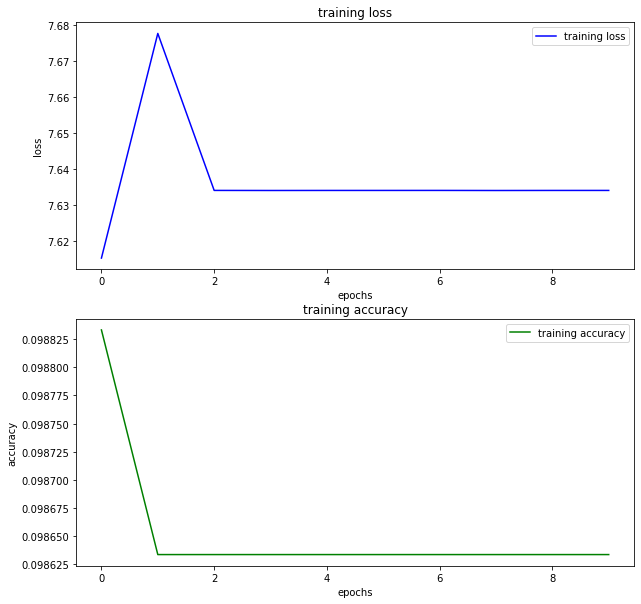

In [43]:
plot_results(history)

In [44]:
# creating a neural network
my_dnn = tf.keras.Sequential([
    # the entry point is our input ! We need to specify the shape of this input 
    tf.keras.Input(shape=input_shape),
    # We can now add our layers ! 
    tf.keras.layers.Dense(16, activation="relu"), 
    tf.keras.layers.Dense(16, activation="relu"), 
    tf.keras.layers.Dense(10, activation="softmax")
])

In [45]:
my_dnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                12560     
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [47]:
my_dnn.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [48]:
history = my_dnn.fit(    
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.5476 - accuracy: 0.8385
Epoch 2/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2605 - accuracy: 0.9237
Epoch 3/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.2128 - accuracy: 0.9376
Epoch 4/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1867 - accuracy: 0.9445
Epoch 5/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1702 - accuracy: 0.9493
Epoch 6/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1578 - accuracy: 0.9530
Epoch 7/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1488 - accuracy: 0.9560
Epoch 8/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1408 - accuracy: 0.9586
Epoch 9/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1358 - accuracy: 0.9599
Epoch 10/10
7500/7500 [==============================] - 15s 2ms/step - l

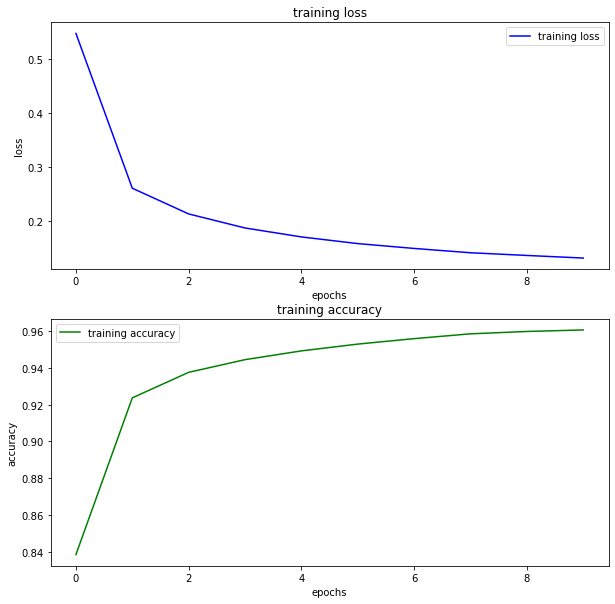

In [49]:
plot_results(history)

In [53]:
predictions = my_dnn.predict(x_test) 
print(predictions.shape)
print(np.argmax(predictions[0]))

(10000, 10)
7


In [58]:
def decode_predictions(one_hot_pred): 
    return np.argmax(one_hot_pred, axis=1)

preds = decode_predictions(predictions)
true_labels = decode_predictions(y_test)

In [59]:
def compute_accuracy(preds, true): 
    accuracy = np.where(preds == true, 1, 0).sum() / len(true)
    print(f"Accuracy : {accuracy}")

In [60]:
compute_accuracy(preds,true_labels)

Accuracy : 0.9552


In [63]:
def confusion_matrix(pred_labels, true_label): 
    M = np.zeros((10,10)) # we have 10 classes ! 
    
    for i in range(len(pred_labels)): 
        pred_value = pred_labels[i] 
        true_value = true_label[i] 
        M[int(pred_value), int(true_value)] += 1
        
    fig = plt.figure()
    ax = fig.add_subplot(111)

    M = ax.matshow(M)
    ax.set_yticklabels([f"pred {x}" for x in range(10)])
    ax.set_xticklabels([f"true {x}" for x in range(10)])
    fig.colorbar(M)
    return

<ipython-input-63-60bdfd34484e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"pred {x}" for x in range(10)])
<ipython-input-63-60bdfd34484e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"true {x}" for x in range(10)])


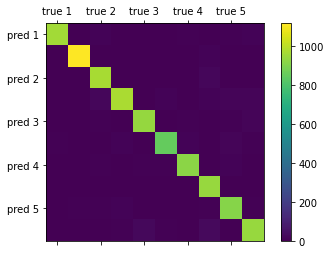

In [66]:
_ = confusion_matrix(preds, true_labels)

In [67]:
my_dnn.save("mnist_dnn.h5")
my_loaded_dnn = tf.keras.models.load_model("mnist_dnn.h5")

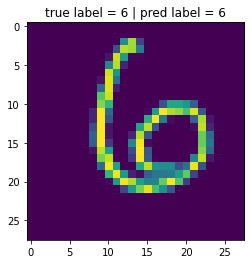

In [69]:
pred = my_loaded_dnn.predict(x=x_test[None,100])
true = y_test[100].argmax()
pred = decode_predictions(pred).squeeze()

plt.title(f"true label = {true} | pred label = {pred}")
_ = plt.imshow(x_test[100].reshape(28,28))